In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest

In [2]:

# Load dataset
file_path = 'C:\\Users\\LAdmin\\Desktop\\uni\\ML\\bank lab 3\\bank-full.csv'
data = pd.read_csv(file_path, sep=',')

In [3]:
# Data Inspection
display(data.head())
display(data.describe())
display(data.isnull().sum())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Figure size 1000x600 with 0 Axes>

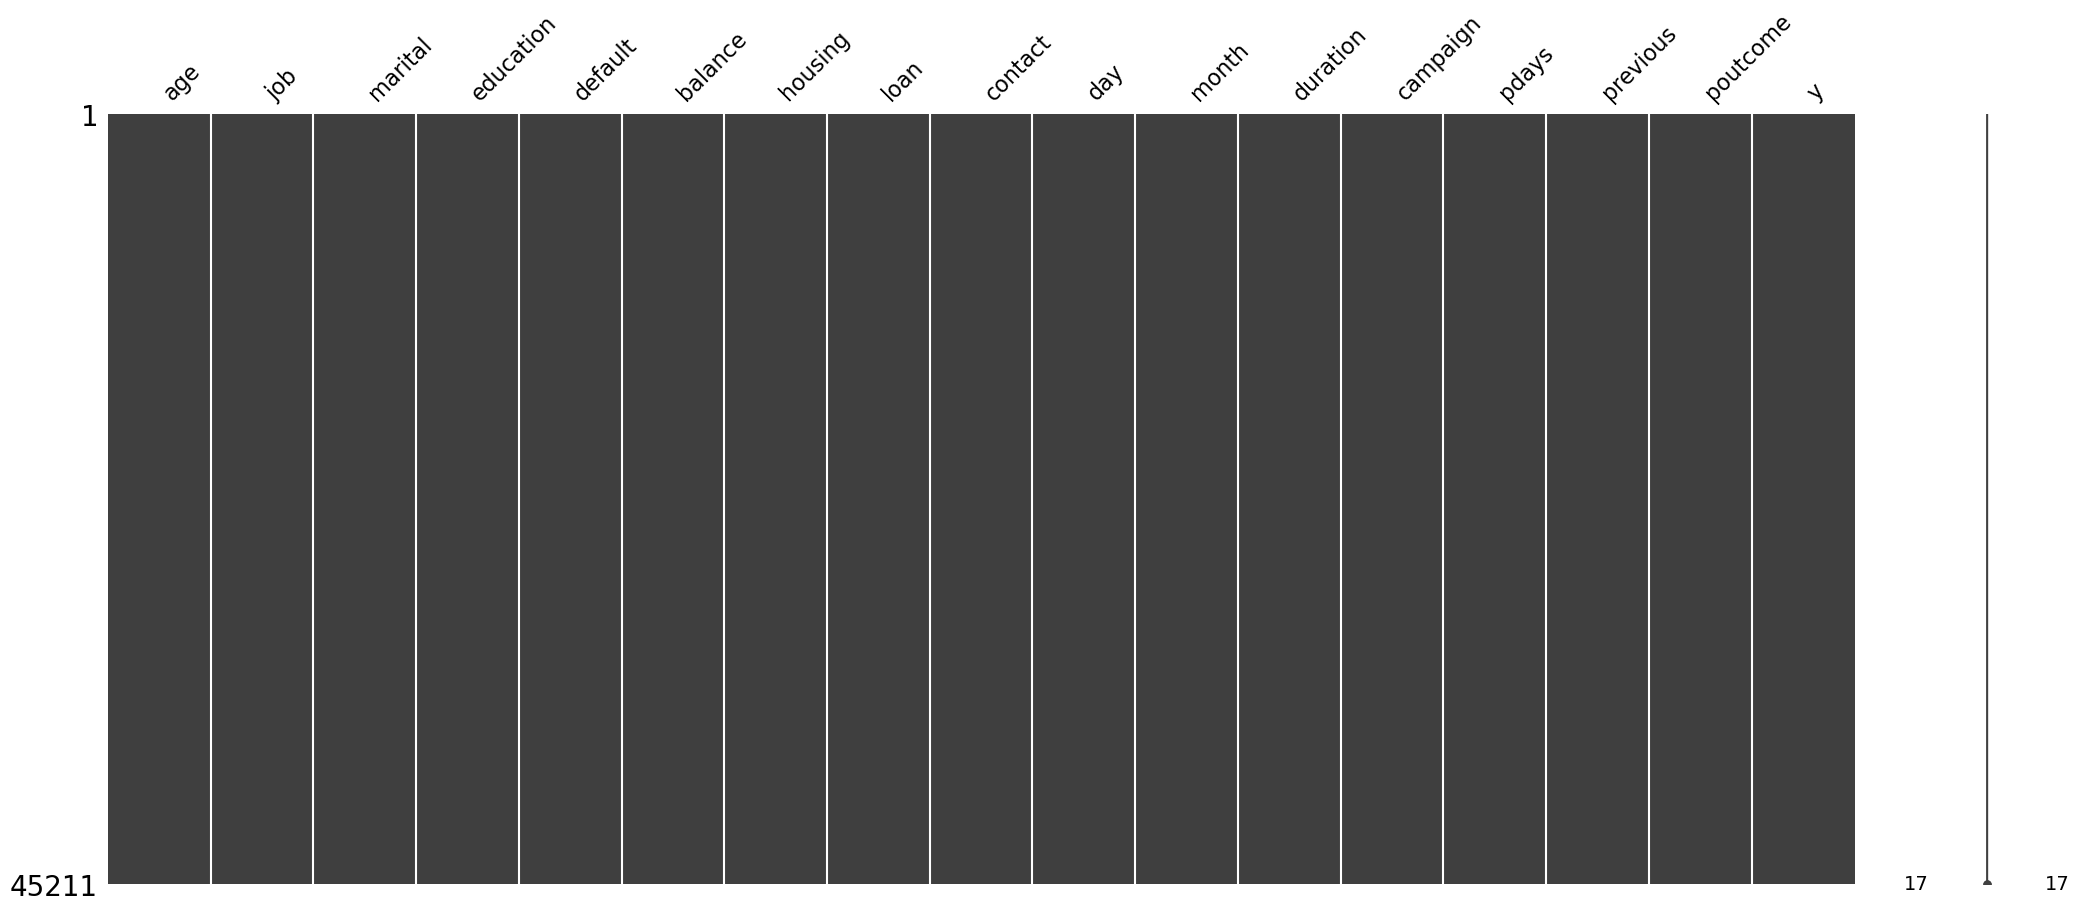

In [4]:
plt.figure(figsize=(10,6))
msno.matrix(data)
plt.show()

In [5]:
# Tratarea valorilor lipsă
data = data.dropna()


In [6]:
# Codificarea variabilelor categoriale
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':  
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

data['y'] = data['y'].map({'yes': 1, 'no': 0})

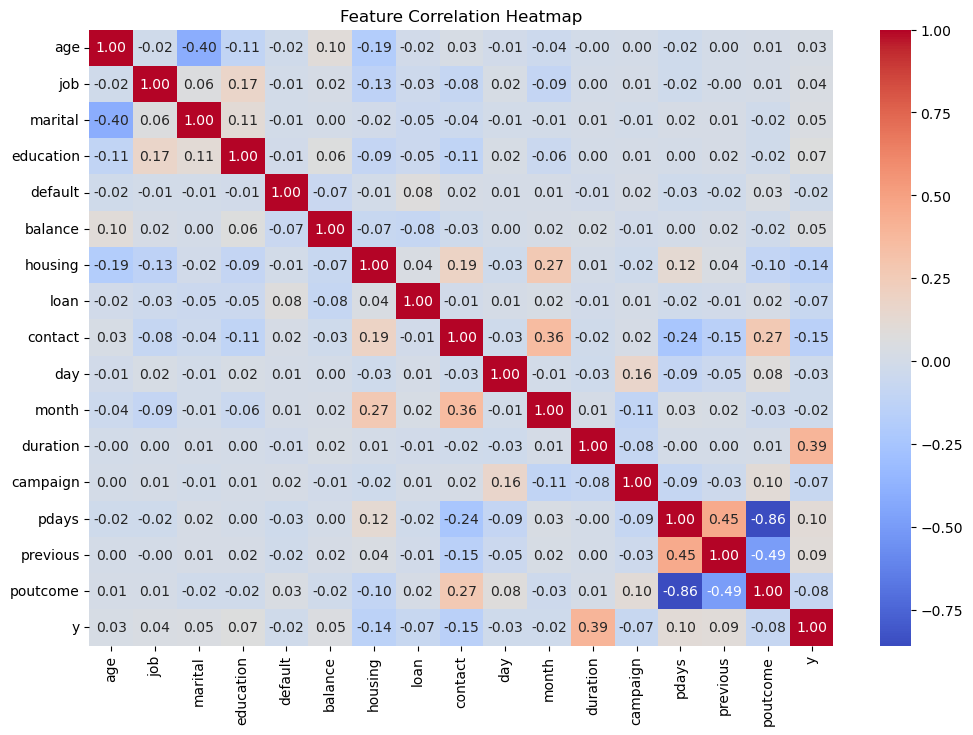

In [7]:

# Vizualizarea corelației dintre variabile
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
# Detectarea și eliminarea outlierilor cu Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data.drop(columns=['y']))
data['anomaly'] = outliers


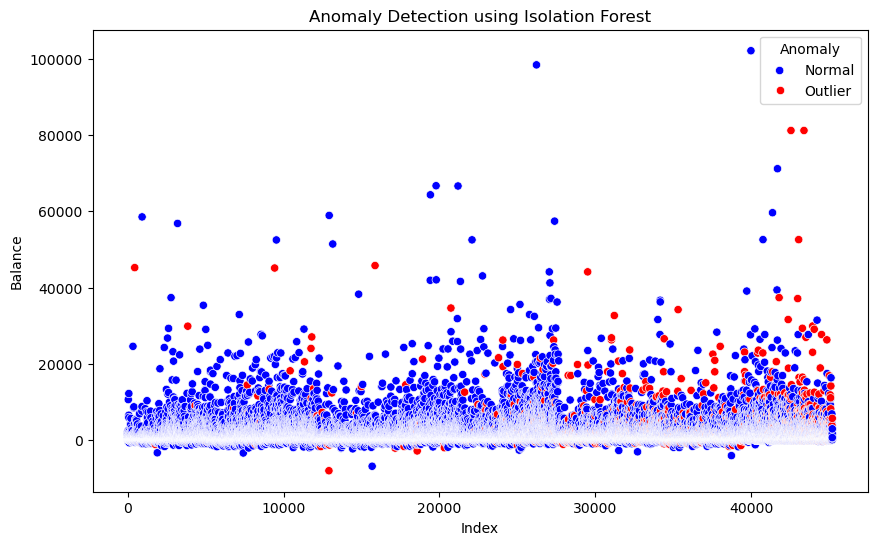

In [9]:
# Visualizing anomaly detection
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.index, y=data['balance'], hue=data['anomaly'], palette={1:'blue', -1:'red'})
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Index")
plt.ylabel("Balance")
plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
plt.show()

In [10]:
# Removing anomalies
data = data[data['anomaly'] == 1].drop(columns=['anomaly'])


In [11]:
# Standardizarea caracteristicilor
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['y']))

# Reducerea dimensionalității folosind PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [12]:
# Aplicarea algoritmului de clustering K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Aplicarea algoritmului de clustering DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

In [13]:
# Compararea performanței clusterelor folosind scorul Silhouette
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)
silhouette_dbscan = silhouette_score(X_pca, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"Silhouette Score - KMeans: {silhouette_kmeans}")
print(f"Silhouette Score - DBSCAN: {silhouette_dbscan}")

Silhouette Score - KMeans: 0.5456180966254272
Silhouette Score - DBSCAN: 0.7187973410630806


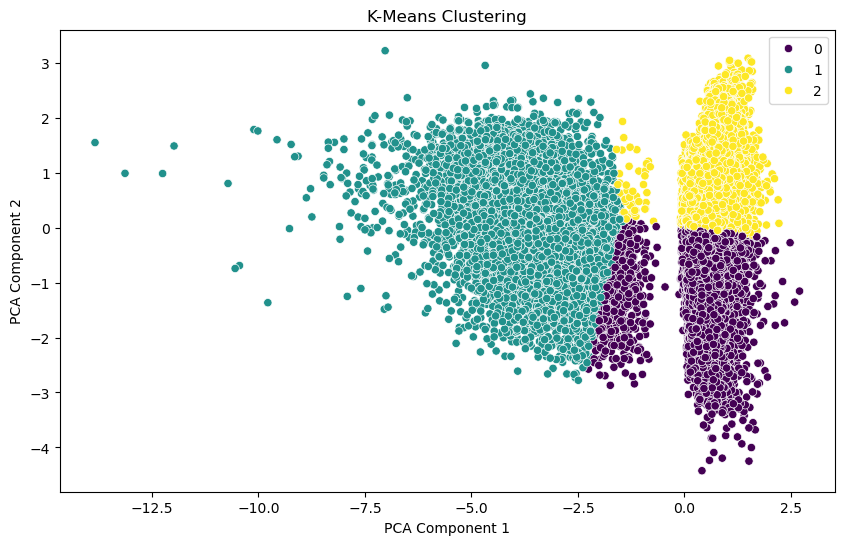

In [14]:
# Vizualizarea clusterelor pentru K-Means
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

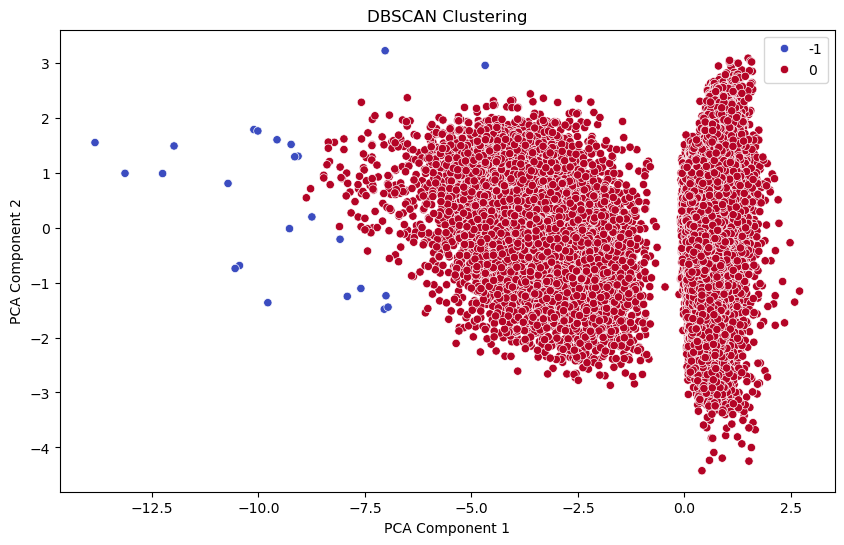

In [15]:
# Vizualizarea clusterelor pentru DBSCAN
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_labels, palette='coolwarm')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
